In [15]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

## Part    1    ‑    Exploratory    data    analysis  The    attached       logins.json       file     contains     (simulated)     timestamps    of    user     logins     in    a    particular  geographic     location.     Aggregate     these     login     counts    based    on    15­ minute     time     intervals,    and  visualize     and    describe     the     resulting     time     series    of     login     counts     in    ways     that    best     characterize     the  underlying    patterns     of     the    demand.     Please     report/illustrate     important     features    of     the    demand,  such     as    daily     cycles.     If     there     are     data     quality     issues,    please     report     them. 

In [16]:
login_df = pd.read_json('C:/Users/vsingh/OneDrive - Red Clay Consulting, Inc/Desktop/ultimate_challenge/logins.json')

In [17]:
login_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [18]:
login_df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [19]:
login_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.7 KB


In [20]:
rangeoftimes = pd.date_range('1970-01-01 20:00:00', '1970-04-13 19:00:00', freq='15T')
times = pd.Series(np.zeros(len(rangeoftimes)), index=rangeoftimes)

In [21]:
times.head()

1970-01-01 20:00:00    0.0
1970-01-01 20:15:00    0.0
1970-01-01 20:30:00    0.0
1970-01-01 20:45:00    0.0
1970-01-01 21:00:00    0.0
Freq: 15T, dtype: float64

In [22]:
login_df = login_df.sort_values('login_time')
login_df = login_df.reset_index(drop=True)

In [23]:
login_df.head()

,login_time
0,1970-01-01 20:12:16
1,1970-01-01 20:13:18
2,1970-01-01 20:16:10
3,1970-01-01 20:16:36
4,1970-01-01 20:16:37


In [24]:
w = 0
for i in range(len(login_df)):
    x = rangeoftimes[w]
    y = rangeoftimes[w+1]
    z = login_df['login_time'][i]
    if x < z < y:
        times[w] = times[w] + 1
    else:
        while (y < z):
            w = w + 1
            x = rangeoftimes[w]
            y = rangeoftimes[w+1]
        times[w] = times[w] + 1
    

In [25]:
times.head(10)

1970-01-01 20:00:00    2.0
1970-01-01 20:15:00    6.0
1970-01-01 20:30:00    9.0
1970-01-01 20:45:00    7.0
1970-01-01 21:00:00    1.0
1970-01-01 21:15:00    4.0
1970-01-01 21:30:00    0.0
1970-01-01 21:45:00    4.0
1970-01-01 22:00:00    9.0
1970-01-01 22:15:00    8.0
Freq: 15T, dtype: float64

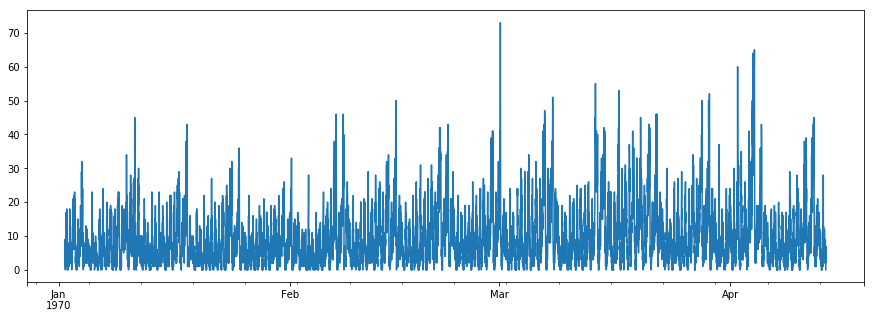

In [26]:
plt.figure(figsize = (15, 5))
times.plot()

+ There appears to be some consistency amongst the peaks which holds true each month, generally speaking. 

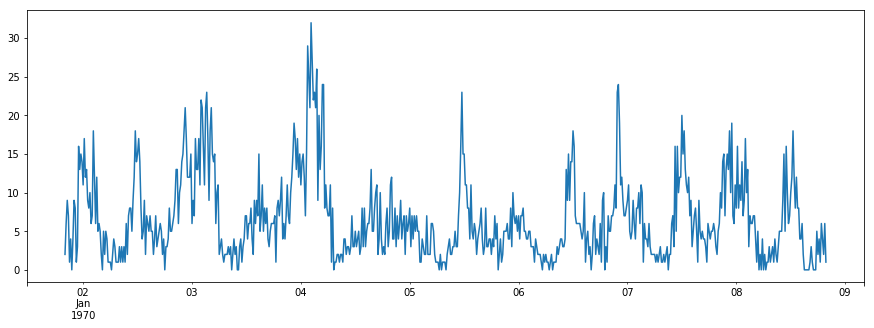

In [27]:
plt.figure(figsize = (15, 5))
times[0:24*7*4].plot()

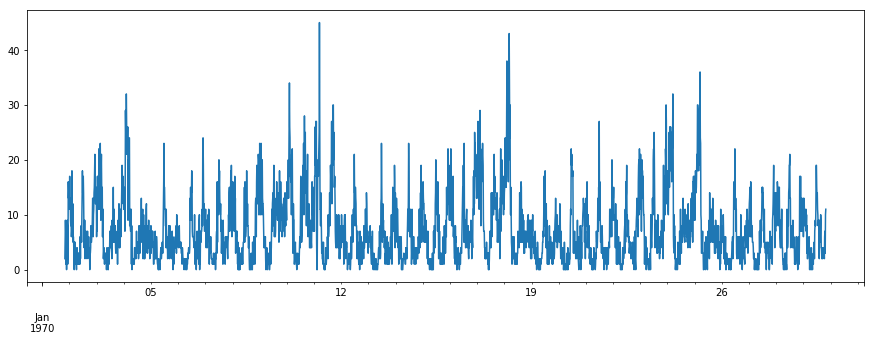

In [30]:
plt.figure(figsize = (15, 5))
times[0:24*7*4*4].plot()

In [37]:
times[times == max(times)].index[0].dayofweek

6

In [38]:
for i in range(14):
    print(times[times == times[i*96*7:(i+1)*96*7].max()].index[0].dayofweek)

6
6
6
6
6
5
6
6
6
6
4
5
2
5


+ Documentation states that the day of "6" corresponds to a sunday and is frequently the day of the week which login frequency is the highest. 

+ It can also be observed that the login count seems to peak every 12 hours or so (typically around noon and midnight)

+ The data had login times which were randomly sorted, but that issue was resolved. 

## Part    2    ‑    Experiment    and    metrics    design  

### The    neighboring     cities    of    Gotham    and    Metropolis    have     complementary     circadian     rhythms:     on  weekdays,    Ultimate    Gotham     is    most     active    at    night,    and    Ultimate    Metropolis     is    most    active  during     the    day.    On    weekends,     there     is     reasonable    activity     in    both     cities.    However,    a     toll    bridge,     with     a     two  ­way     toll,    between     the     two     cities     causes    driver    partners     to     tend  to    be    exclusive     to    each     city.     The     Ultimate    managers    of     city    operations     for     the     two     cities    have  proposed    an    experiment     to     encourage    driver    partners     to    be    available     in    both     cities,    by  reimbursing    all     toll     costs.  
1. What    would     you     choose     as     the     key    measure    of     success    of     this    experiment     in  encouraging    driver     partners     to     serve    both     cities,    and    why    would     you     choose     this    metric?  
2. Describe    a    practical     experiment     you    would    design     to     compare     the    effectiveness    of     the  proposed     change     in     relation     to     the     key    measure    of     success.    Please    provide    details     on:   a. how     you    will     implement     the    experiment  b. what     statistical     test(s)     you    will     conduct     to     verify     the     significance    of     the  observation  c. how     you    would     interpret     the     results    and    provide     recommendations     to     the     city  operations     team    along    with    any     caveats. 


+ The key measure of success would be the number of trips which began in one city and ended in the other city. The entire point of the experiment is to increase transportaion between the two cities, so this metric is crucial. To gauge the success of this metric, it would be worthwhile to compare the number of trips between the two cities, to the number of trips which are taken from each city to other cities or trips of a similar distance (this could be the average distance of trips between Gotham and Metropolis). This would be a good for determining the relative frequency which tripswould be made due to this new system, compared to the total number of trips as a whole. To properly gauge this metric, time will be needed to aquire this data, with focus placed on the weekends. 

+ After the data is aquired (lets say for 10 weeks) then we could compare the number of trips taken between the cities before the experiment and after the experiment. A statistical test to tell if any difference in the number of trips would be effective for telling if the experiment worked. Since drivers tended to be exlusive to each city before, we could formulate a hypothesis to test to gauge if the number of trips had gone up as much as we would like (by a factor of 3, for example). If the test showed significant change, then it would be worthwhile to do a cost analysis on how much this new experiment made a financial impact on both driver partners and the company, when considering toll fares. If this analysis seemed to be beneficial overall, then it would be important to also analyze any particular weekend occasions for which travel between the two cities would be up. For example, if a big sports stadium was in metropolis and frequently had games on saturday and the 10 weeks of data was during peak game season, this would warrant a lot of travel and skew the results. Such considerations would need to be taken into account when considering the analysis of the data, along with historical data for comparison. 

## Part    3    ‑    Predictive     modeling   

### Ultimate     is     interested     in     predicting     rider     retention.    To    help    explore     this    question,    we    have  provided     a     sample    dataset     of     a     cohort    of    users    who     signed    up     for    an    Ultimate    account     in  January    2014.    The     data    was    pulled     several    months     later;    we     consider    a    user     retained     if     they  were     “active”     (i.e.     took    a     trip)     in     the     preceding    30    days.    We     would     like     you     to    use     this    data     set     to    help    understand    what     factors    are     the    best    predictors  for     retention,    and    offer     suggestions     to     operationalize     those     insights     to    help    Ultimate.    The    data     is     in     the    attached     file     ultimate_data_challenge.json.    See    below     for    a    detailed  description     of     the    dataset.     Please     include    any     code     you    wrote     for     the    analysis    and    delete     the  dataset    when     you    have     finished     with     the     challenge

In [43]:
with open("C:/Users/vsingh/OneDrive - Red Clay Consulting, Inc/Desktop/ultimate_challenge/ultimate_data_challenge.json") as f:
    data = json.load(f)

In [46]:
ultimate_data = pd.DataFrame(data)
ultimate_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [47]:
ultimate_data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [50]:
ultimate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.5+ MB


In [61]:
# This will check if a last trip data is within one month of a date 6 months 
# from their start date.
active_users = []
for i in range(len(ultimate_data)):
    st = pd.Timestamp(ultimate_data['signup_date'][i]) #get start date
    et = st + pd.Timedelta('181D') #6 months later
    at = et - pd.Timedelta('30D') #set point 30 days prior
    if at <= pd.Timestamp(ultimate_data['last_trip_date'][i]) <= et:
        active_users.append([1]) # now that the active condition has been met, set active user to 1
    else:
        active_users.append([0])

In [62]:
df = pd.DataFrame(active_users, columns = ['active_users'])

In [63]:
df.head(10)

,active_users
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,0
9,0


In [64]:
df['active_users'].value_counts()

0    37802
1    12198
Name: active_users, dtype: int64

In [65]:
print("The percent of active users after 6 months is", 12198*100/len(df), "%")

The percent of active users after 6 months is 24.396 %


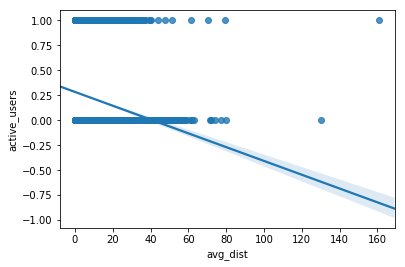

In [73]:
#Seems this is worth including
sns.regplot(y=df['active_users'], x=ultimate_data['avg_dist'], fit_reg = True)

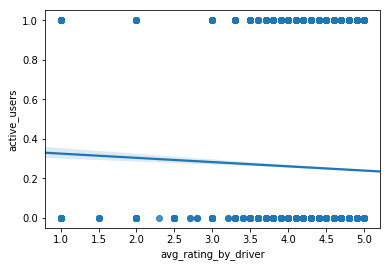

In [74]:
sns.regplot(y=df['active_users'], x=ultimate_data['avg_rating_by_driver'], fit_reg = True)

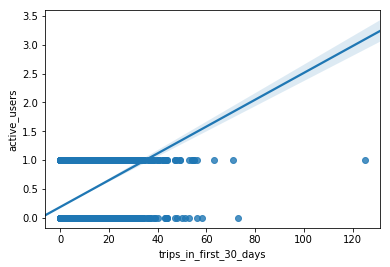

In [75]:
sns.regplot(y=df['active_users'], x=ultimate_data['trips_in_first_30_days'], fit_reg = True)

In [129]:
new_df = pd.concat([ultimate_data, df], axis = 1)

In [130]:
new_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_users
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [131]:
from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()
le1.fit(['Astapor',"King's Landing",'Winterfell'])
le2 = preprocessing.LabelEncoder()
le2.fit(['iPhone','Android'])

LabelEncoder()

In [128]:
df = df.dropna()
df = df.reset_index(drop = True)

In [132]:
label1 = le1.transform(new_df['city']) 
df1 = pd.DataFrame(label1)
df1.columns = ['city1']

In [133]:
new_df2 = pd.concat([new_df, df1], axis = 1)

In [134]:
new_df2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_users,city1
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0,2


In [135]:
UB = []
for i in range(len(df)):
    if new_df2['ultimate_black_user'][i] == True:
        UB.append([1]) 
    else:
        UB.append([0])
df_ub = pd.DataFrame(UB ,columns = ['UB'])
df_ub.head()

,UB
0,1
1,0
2,0
3,1
4,0


In [136]:
final_df = pd.concat([new_df2, df_ub], axis = 1)

In [137]:
final_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_users,city1,UB
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0,1,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0,0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0,0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1,1,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0,2,0


In [151]:
y = final_df['active_users']
X = final_df[['avg_dist', 'avg_rating_by_driver','trips_in_first_30_days', 'city1','UB']].fillna(X['avg_rating_by_driver'].mean()).reset_index(drop = True)


In [155]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

logreg = LogisticRegression()

# Fit to training data
logreg.fit(X_train,y_train)

# Predict 
y_pred = logreg.predict(X_test)

# Print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[9264  180]
 [2777  279]]
             precision    recall  f1-score   support

          0       0.77      0.98      0.86      9444
          1       0.61      0.09      0.16      3056

avg / total       0.73      0.76      0.69     12500



In [156]:
X.dropna().describe()

,avg_dist,avg_rating_by_driver,trips_in_first_30_days,city1,UB
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,5.796827,4.778158,2.278200,1.136040,0.37708
std,5.707357,0.445753,3.792684,0.882558,0.48466
min,0.000000,1.000000,0.000000,0.000000,0.00000
25%,2.420000,4.700000,0.000000,0.000000,0.00000
50%,3.880000,5.000000,1.000000,1.000000,0.00000
75%,6.940000,5.000000,3.000000,2.000000,1.00000
max,160.960000,5.000000,125.000000,2.000000,1.00000


In [154]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

cv_auc = cross_val_score(logreg, X, y, cv = 10,scoring = 'roc_auc')

print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.671179837166344
AUC scores computed using 5-fold cross-validation: [0.65692266 0.66819885 0.66069444 0.67859344 0.65199746 0.67108726
 0.66246433 0.65932323 0.67111053 0.67616259]


In [158]:
# Hyperparameter grid
c_space = np.logspace(-5, 8, 15)

param_grid = {'C': c_space}

logreg = LogisticRegression()

# Instantiate the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit 
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("The highest score of the model is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.05179474679231213}
The highest score of the model is 0.76448


+ It can be observed that the best parameters allow this model to be roughly 76% accurate. The model has a 98% recall for inactive users, but has a very low recall rate for the active users, although the prediction precision is roughly 61% for them. 

+ This definition of defining an "active" user may need some adjustment, as there could be many factors which impact a user being active during this time and even shifting a few days from the definition could produce different results. 

+ It can be observed that the "Average Distance" and "Trips in the first 30 days" are highly correlated with active users. It seems longer trips result in a lower presence of active users, meaning those who use the app for shorter trips are more likely to be retained. In addition, those who use the app frequently in their first 30 days are more likely to be considered "active". This also makes sense, because it highly considers those who may use the app for a "one off" usage and demonstrates that those who have the frequent need for such an app are more likely to still need the service a few months later.

+ I believe a big component of the success of the app is to focus retention efforts with incentives and perhaps additional advertisements in the cities which most frequently use the service. Analysis did not reveal any major distinction between iPhone and Android users, so these efforts should be targeted similarly across all mobile carriers (iPhone retention was only slightly better, so I am speaking under the assumption that the difference isn't significant). 